In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scienceplots
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

In [2]:
# Generate 1e6 random numbers between 0 and 5 
# make 1000 bins from 0-5  
# probability distribution is the number of values at least > min val of bin
tau_array = [-np.log(1-random.uniform(0, 1)) for i in range(1000000)]

In [3]:
hist, bin_edges = np.histogram(tau_array, bins=1000)
bin_width = bin_edges[1] - bin_edges[0]

In [ ]:
prob_distribution = hist * bin_width
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
cumulative_prob = np.cumsum(prob_distribution)
ccdf = 1 - cumulative_prob/cumulative_prob[-1] # get cumulative prob dist

Text(0.0, 1.0, 'matching fig 6.4 in book')

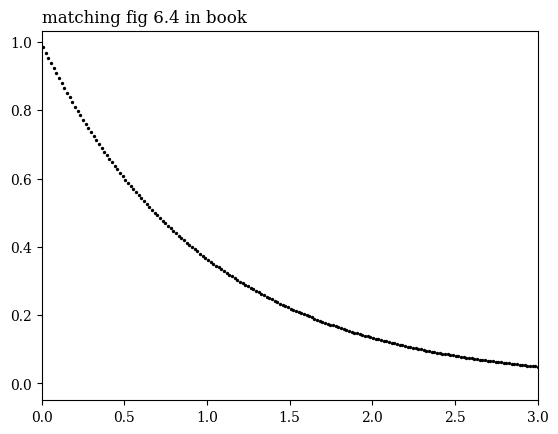

In [5]:
plt.scatter(bin_centers, ccdf, s=2, color="black", label="calculated")
plt.xlim(0, 3)
plt.title("matching fig 6.4 in book", loc="left")

In [ ]:
# scattering function
def scatter(tau, tau_array, dirscat, optd, numT, numR):
    '''
    If photon is not transmitted (T), reflected (R), or absorbed (A)
    let it keep scattering until it is T, R, or A
    '''
    # if photon has not scattered or reflected, keep doing it
    while 0 < tau < optd:
        scattau = random.choice(tau_array)
        if prob_fwd>=np.random.uniform():
            tau = tau + dirscat*scattau
            dirscat = dirscat # keep track of the direction of scattering from the original
        else: 
            tau = tau - dirscat*scattau
            dirscat = -dirscat # keep track of the direction of scattering from the original
            
        
        if tau >= optd: numT = numT + 1; dirscat=1; break 
        if tau <= 0: numR = numR + 1; dirscat=1; break 
    
    return numR, numT

In [ ]:
# set up constants & counts, init empty arrays 
g = 0.85 # from class
prob_back = (1-g)*0.5 # probability backscatter (low prob)
prob_fwd = (1+g)*0.5 # probability forward scatter (high prob)
numR = 0; numT = 0; numA = 0 # set number reflected (R) and transmitted (T) and absorbed (A)
num_sims = 1000 # number of samples of tau per cloud level for monte carlo
R_array = [] # array of numR
T_array = [] # array of numT
dirscat = 1 # keep track of the direction of scattering where 1 is forward and -1 is back

# Make 100 clouds of layers 1-100 
# for each # of layers, count how many photons are transmitted and how many reflected
optical_depths = np.arange(0, 101, 1)
for optd in optical_depths: 
    for sim in range(num_sims):
        # get a tau value
        tau = random.choice(tau_array)
        if tau >= optd: numT = numT + 1; continue 
        if tau <= 0: numR = numR + 1; continue 
        # keep scattering until reflected, transmitted, or absorbed
        numR, numT = scatter(tau, tau_array, dirscat, optd, numT, numR)
            
    R_array.append(numR/num_sims)
    T_array.append(numT/num_sims)
    numR=0
    numT=0

In [ ]:
# generate theoretical values
R_theory=[]
T_theory=[]
for cloud in optical_depths:
    Rt_value = cloud/(cloud+13)
    Tt_value = 1/(1+(cloud*prob_back))
    R_theory.append(Rt_value)
    T_theory.append(Tt_value)

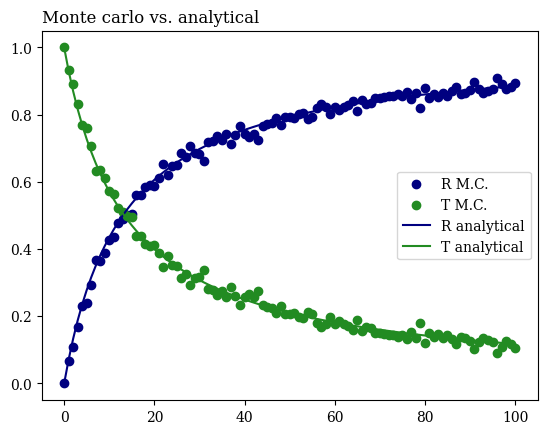

In [ ]:
plt.scatter(optical_depths, R_array, label="R M.C.", color="navy")
plt.scatter(optical_depths, T_array, label="T M.C.", color="forestgreen")
plt.plot(optical_depths, R_theory, label="R theoretical",color="navy")
plt.plot(optical_depths, T_theory, label="T theoretical", color="forestgreen")
plt.title("Monte carlo vs. analytical", loc="left")
plt.legend()